In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from pgmpy.inference import VariableElimination

def compute_bibas_pairwise(model, source, target):
    infer = VariableElimination(model)
    try:
        p0 = infer.query(variables=[target], evidence={source: 0}).values[1]
        p1 = infer.query(variables=[target], evidence={source: 1}).values[1]
        return abs(p1 - p0) * 100
    except:
        return np.nan

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.patches as patches
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import random

In [4]:
# Create a random DAG with 10 nodes
random.seed(33)

nodes = [chr(i) for i in range(65, 75)]  # A–J
edges = []
for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        if random.random() < 0.25:
            edges.append((nodes[i], nodes[j]))
            
bn = DiscreteBayesianNetwork(edges)

# 2. Add dummy binary CPDs
for node in bn.nodes():
    parents = bn.get_parents(node)
    num_parents = len(parents)
    card = 2
    num_rows = card
    num_cols = 2 ** num_parents if num_parents else 1
    values = np.random.dirichlet(np.ones(num_rows), size=num_cols).T
    cpd = TabularCPD(variable=node, variable_card=card, values=values,
                     evidence=parents if parents else None,
                     evidence_card=[2]*num_parents if num_parents else None)
    bn.add_cpds(cpd)

bn.check_model()

True

In [7]:
# Defining a simple example Bayesian Network
bn = DiscreteBayesianNetwork([('A', 'C'), ('B', 'C'), ('C', 'D')])

cpd_A = TabularCPD(variable='A', variable_card=2, values=[[0.7], [0.3]])
cpd_B = TabularCPD(variable='B', variable_card=2, values=[[0.6], [0.4]])
cpd_C = TabularCPD(variable='C', variable_card=2,
                   values=[[0.9, 0.4, 0.5, 0.1],
                           [0.1, 0.6, 0.5, 0.9]],
                   evidence=['A', 'B'],
                   evidence_card=[2, 2])
cpd_D = TabularCPD(variable='D', variable_card=2,
                   values=[[0.8, 0.3],
                           [0.2, 0.7]],
                   evidence=['C'],
                   evidence_card=[2])

bn.add_cpds(cpd_A, cpd_B, cpd_C, cpd_D)
bn.check_model()

True

In [15]:
# Create a random DAG with 10 nodes
random.seed(33)

nodes = [chr(i) for i in range(65, 75)]  # A–J
edges = []
for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        if random.random() < 0.25:
            edges.append((nodes[i], nodes[j]))
            
bn = DiscreteBayesianNetwork(edges)

# 2. Add dummy binary CPDs
for node in bn.nodes():
    parents = bn.get_parents(node)
    num_parents = len(parents)
    card = 2
    num_rows = card
    num_cols = 2 ** num_parents if num_parents else 1
    values = np.random.dirichlet(np.ones(num_rows), size=num_cols).T
    cpd = TabularCPD(variable=node, variable_card=card, values=values,
                     evidence=parents if parents else None,
                     evidence_card=[2]*num_parents if num_parents else None)
    bn.add_cpds(cpd)

bn.check_model()

True

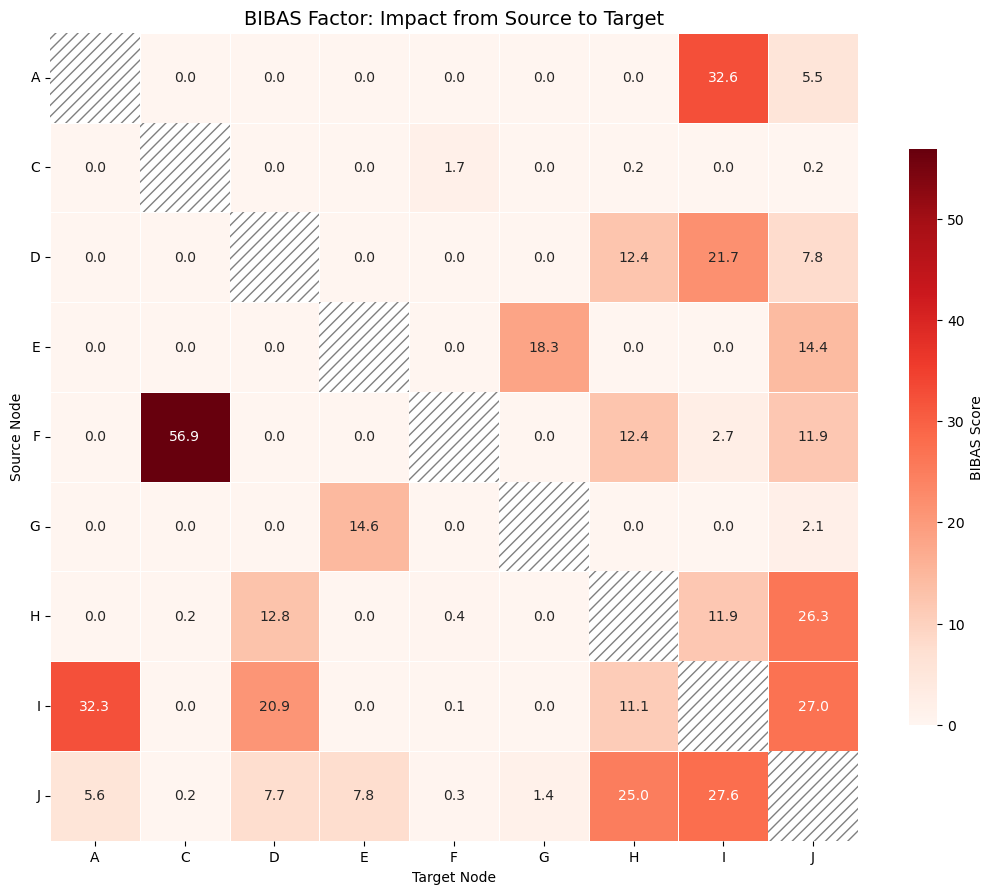

In [17]:
plot_bibas_heatmap(bn)